<a href="https://colab.research.google.com/github/torix/Lecture-ComplexNetworks/blob/master/ComplexNetwork03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ネットワーク指標の計算

NetworkXを使って様々なネットワークの指標を計算します．

NetworkXのドキュメントは，https://networkx.github.io/documentation/stable/index.html を参考．


# 0．準備

## 0.1. 日本語の表示

一番最初にGoogleColaboratory上で図に日本語を利用するためのおまじないを実行します．


以下のコードを実行して，出力された値を次のコードに書いて実行します．<br>
最初に一度だけ行ってください．

In [1]:
!pip install japanize-matplotlib

!apt-get -y install fonts-ipafont-gothic
!rm -r /root/.cache/matplotlib


     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=b98b80ed0bb7a6930f2ee33ea76cf00780d27d6720d244c3a0d8db74b773aef8
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mi

ここまで実行後，一度ランタイムをリブートします．

一度実行後は，ここまでのコードは実行する必要がありません．




## 0.1. NetworkXの準備

ネットワークのライブラリであるNetworkXと，描画用にmatplotlibの中のpyplotをインポートします．<br>
%matplotlib inlineはjupyter内でグラフを表示するためのおまじないです．

ついでに，ネットワーク読み込み用の関数もここで定義しておきます．





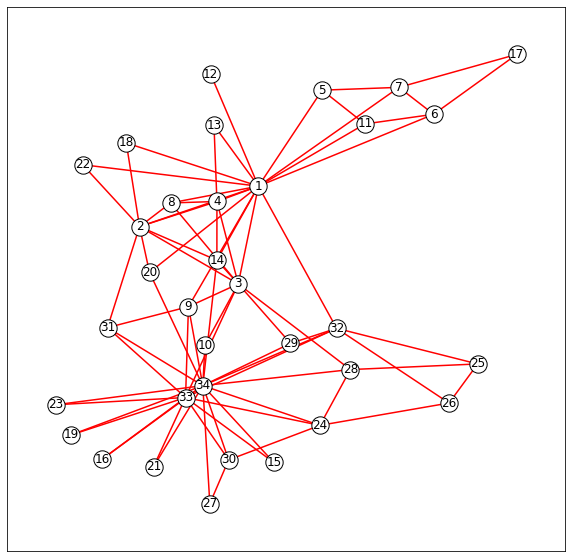

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib 
import networkx as nx
from IPython.display import set_matplotlib_formats
%matplotlib inline

import pandas as pd
import collections

import requests
from google.colab import files

def readNetwork(url=None, splitter=","):
  # ネットワークを読み込む
  if url == None:
    uploaded = files.upload()
    edge_text = list(uploaded.values())[0].decode()
  else:
    res = requests.get(url)
    res.encoding = res.apparent_encoding
    edge_text = res.text

  # edgeとして読み込める形式に変換
  edge_list = list(item.split(splitter) for item in edge_text.split("\n"))
  edge_list = [a for a in edge_list if len(a) != 1]
  # 無向グラフを作成
  G = nx.Graph() 

  # ネットワークの作成
  G.add_edges_from(edge_list)
  return G

def showNetwork(G, node_value=None):
  #描画する
  # 描画サイズ
  plt.figure(figsize=(10,10))
  # ノードをバネモデルで配置する
  pos = nx.spring_layout(G, k=0.3, seed=0)
  # ノード，エッジ，ラベルの描画
  nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
  if node_value == None:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
  else:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=list(node_value.values()), cmap=plt.cm.Reds, edgecolors="black")
  
  # 描画
  plt.show()

  
def showDegreeDistribution(G):
  degree = G.degree
  degree_distribution = collections.Counter(dict(degree).values()) # 次数を次数分布のヒストグラムに変換

  # 次数分布をプロットする
  plt.plot(list(degree_distribution.keys()), list(degree_distribution.values()), 'bo') #次数分布をプロット

  # 両対数グラフをやめる場合は，この二つのコメントアウトをします．
  plt.xscale('log') 
  plt.yscale('log')
  plt.show()

  df = pd.DataFrame.from_dict(degree_distribution, orient='index')
  print(df.sort_index())


G = readNetwork("http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/karate.dat")
showNetwork(G)


# 1. 次数分布

### 1.2 次数分布


次数がどの程度のノードがどのくらい存在するのかを求めたものが次数分布です．









     0
1    1
2   11
3    6
4    6
5    3
6    2
9    1
10   1
12   1
16   1
17   1


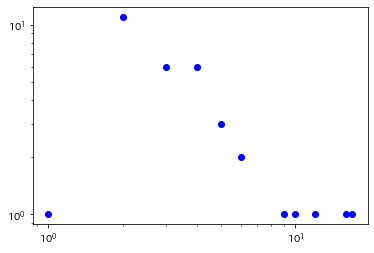

     0
1    1
2   11
3    6
4    6
5    3
6    2
9    1
10   1
12   1
16   1
17   1


In [6]:
import collections

# 次数分布を取得
degree = G.degree
degree_distribution = collections.Counter(dict(degree).values()) # 次数を次数分布のヒストグラムに変換
df = pd.DataFrame.from_dict(degree_distribution, orient='index')
print(df.sort_index())

showDegreeDistribution(G)

# 次数分布をプロットする
#plt.plot(degree_distribution.keys(), degree_distribution.values(), 'bo') #次数分布をプロット

# 両対数グラフをやめる場合は，この二つのコメントアウトをします．
#plt.xscale('log') 
#plt.yscale('log')


#plt.show()

### 1.1.3.様々な次数分布

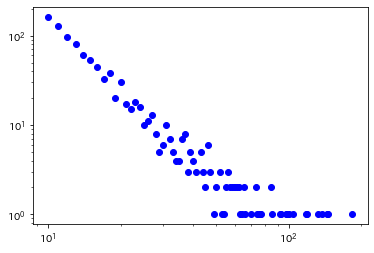

       0
10   163
11   128
12    97
13    81
14    61
..   ...
132    1
137    1
144    1
146    1
184    1

[75 rows x 1 columns]


In [7]:
#バラバシアルバートネットワーク
G_BA = nx.barabasi_albert_graph(1000, 10)
showDegreeDistribution(G_BA)



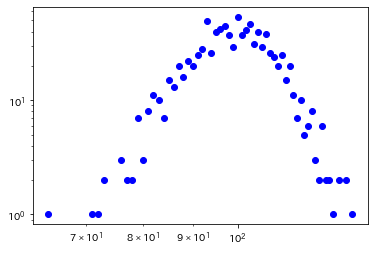

      0
64    1
71    1
72    1
73    2
76    3
77    2
78    2
79    7
80    3
81    8
82   11
83   10
84    7
85   15
86   13
87   20
88   16
89   22
90   20
91   25
92   28
93   49
94   26
95   40
96   42
97   45
98   37
99   29
100  54
101  37
102  41
103  47
104  31
105  40
106  29
107  38
108  26
109  24
110  20
111  25
112  15
113  20
114  11
115   7
116  10
117   5
118   6
119   8
120   3
121   2
122   6
123   2
124   2
125   1
127   2
129   2
131   1


In [8]:
#エルディシュレイニーネットワーク
G_ER = nx.gnp_random_graph(1000, 0.1)
showDegreeDistribution(G_ER)


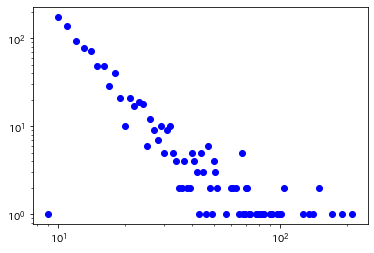

       0
9      1
10   176
11   137
12    92
13    78
..   ...
140    1
149    2
170    1
189    1
211    1

[75 rows x 1 columns]


In [9]:

#HolmeKimネットワーク
G_HK = nx.powerlaw_cluster_graph(1000, 10, 0.1)
showDegreeDistribution(G_HK)

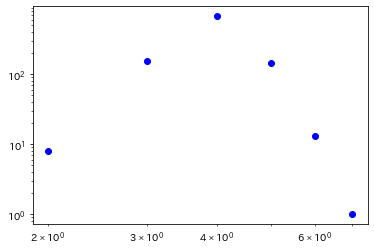

     0
2    8
3  157
4  677
5  144
6   13
7    1


In [10]:
#SmallWorldネットワーク
G_WS = nx.watts_strogatz_graph(1000, 4, 0.1)
showDegreeDistribution(G_WS)

## 2.モチーフ

In [12]:
import numpy as np
import itertools

## We define each S* motif as a directed graph in networkx
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
    }

def mcounter(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    #We use iterools.product to have all combinations of three nodes in the
    #original graph. Then we filter combinations with non-unique nodes, because
    #the motifs do not account for self-consumption.

    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    triplets = map(list, map(np.sort, triplets))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]

    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs

    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        mot_match = map(lambda mot_id: nx.is_isomorphic(sub_gr, mo[mot_id]), motifs.keys())
        match_keys = [mo.keys()[i] for i in xrange(len(mo)) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1

    return mcount


## 3.コミュニティ抽出
### 3.1.クリーク

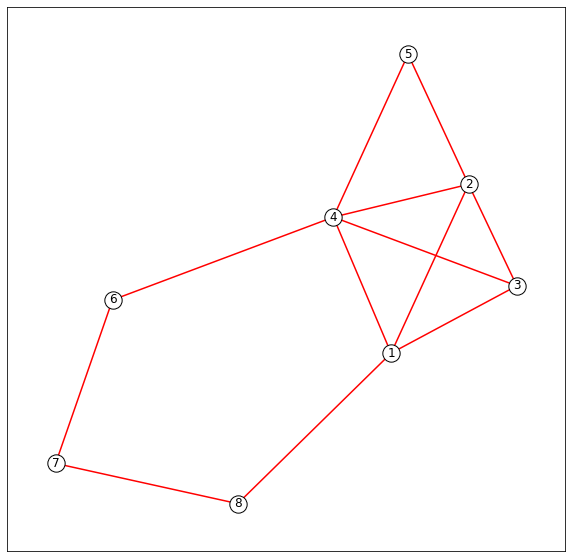

[[8, 1], [8, 7], [4, 2, 1, 3], [4, 2, 5], [4, 6], [7, 6]]


In [13]:

# 最大となるCliqueを

G = nx.Graph([(1,2),(1,3),(1,4),(1,8),(2,3),(2,4),(2,5),(3,4),(4,5),(4,6),(6,7),(7,8)])
showNetwork(G)

print(list(nx.find_cliques(G)))
